# Matplotlib Tutorial EuroSciPy 2016

Sepideh Alassi, University of Basel  
Susanne Greiner, Würth Phoenix S.r.l.




## Part II - Images, Contours & More

In order to see the resulting plots, matplotlib should be inlined in the first cell of IPython.

In [1]:
%matplotlib inline

 For handling images in addition to **import matplotlib** and **matplotlib.pyplot** we are going to need **matplotlib.image**

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


### Importing image data into Numpy arrays

Loading image data is supported by the Pillow library. Natively, matplotlib only supports PNG images. The commands shown below fall back on Pillow if the native read fails.

The image used in this example is a PNG file, but keep that Pillow requirement in mind for your own data.

Here are the images we are going to play with:

![Erlanger Bergkirchweih](BKW_Erlangen.png)

![EuroScipy Logo](ESP_2016.png)

### Manipulating image numpy arrays¶

The plot object produced by **imshow** gives you an easy way to manipulate the plot from the prompt. Note: you can also plot any numpy array.

In [3]:
img1 = mpimg.imread('BKW_Erlangen.png')
img2 = mpimg.imread('ESP_2016.png')

print(img1.shape, img2.shape)

(520, 801, 3) (520, 801, 4)


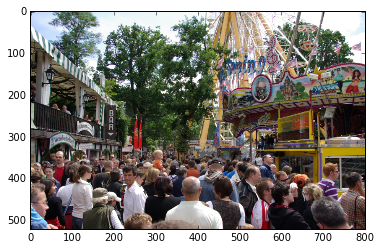

In [4]:
imgplot1 = plt.imshow(img1)

In [5]:
img1[0,0:10]

array([[ 0.73725492,  0.80392158,  0.98431373],
       [ 0.74117649,  0.80784315,  0.98823529],
       [ 0.74117649,  0.81568629,  0.98431373],
       [ 0.74117649,  0.81568629,  0.98431373],
       [ 0.74117649,  0.81176472,  0.98823529],
       [ 0.73725492,  0.80784315,  0.98431373],
       [ 0.74509805,  0.81176472,  0.98039216],
       [ 0.74509805,  0.81176472,  0.98431373],
       [ 0.74509805,  0.81176472,  0.98431373],
       [ 0.74117649,  0.81568629,  0.98431373]], dtype=float32)

It’s a 24-bit RGB PNG image (8 bits for each of R, G, B).

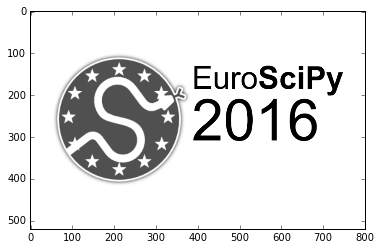

In [6]:
imgplot2 = plt.imshow(img2)

In [7]:
img2[0,0:10]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]], dtype=float32)

It’s a 32-bit RGBA PNG image (8 bits for each of R, G, B, A). The 4th channel is transparency (alpha), or single-channel grayscale (luminosity).

Note the **dtype** - float32. Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0.

Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it’s a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, matplotlib supports float32 and uint8 data types. For grayscale, matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.

#### Exercise: Produce an Bergkirchweih image that is semitransparent
Hint: it should look like
![semitransparent](BKW_semit.png)

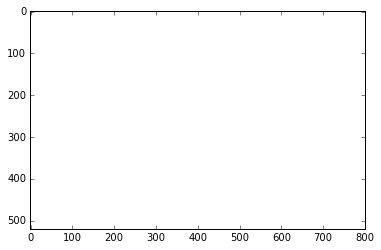

In [8]:
from IPython.html.widgets import interact
def plot_transparent_image(t_deg):
    img1_t = t_deg * np.ones([img1.shape[0],img1.shape[1],4])
    img1_t[:,:,0:3] = img1
    plt.imshow(img1_t)
interact(plot_transparent_image, t_deg=[0, 1, 0.25]);

#### Exercise: Produce a Bergkirchweih image that fades on the right (transparency gradient)
Hint: it should look like
![gradient](BKW_gradient.png)

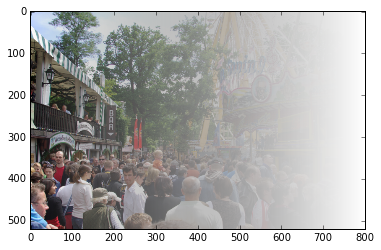

In [9]:
img1_t = np.ones([img1.shape[0],img1.shape[1],4])
img1_t[:,:,0:3] = img1
for i in range(img1_t.shape[0]):
    img1_t[i,:,3] = np.linspace(1,0,801)
plt.imshow(img1_t)

#### Exercise: cut a few blank pixels at the border of the SciPy Logo image
Hint: you can cut 50 pixels at each side and 100 at the top and the bottom

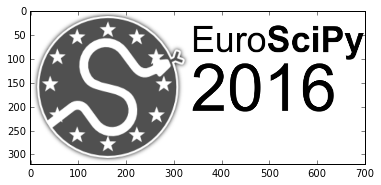

In [10]:
plt.imshow(img2[100:-100,50:-50,:])

#### Applying pseudocolor schemes to image plots¶

Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. So letus just pick one channel of our data:

In [11]:
lum_img2 = img2[:,:,0]

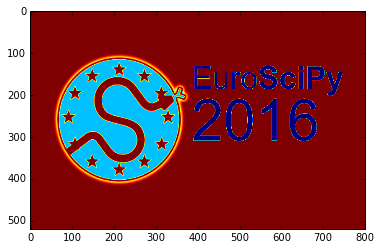

In [12]:
plt.imshow(lum_img2)

Now, with a luminosity (2D, no color) image, the default colormap is applied. The default is called **jet**. There are plenty of others to choose from. 

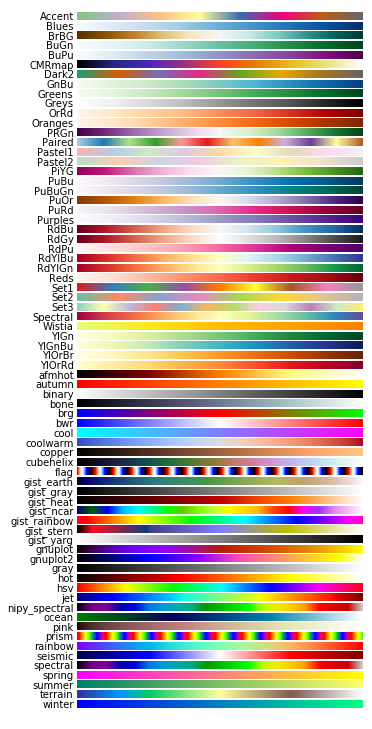

In [13]:
# This example comes from the Cookbook on www.scipy.org.  According to the
# history, Andrew Straw did the conversion from an old page, but it is
# unclear who the original author is.
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 256).reshape(1,-1)
a = np.vstack((a,a))

# Get a list of the colormaps in matplotlib.  Ignore the ones that end with
# '_r' because these are simply reversed versions of ones that don't end
# with '_r'
maps = sorted(m for m in plt.cm.datad if not m.endswith("_r"))
nmaps = len(maps) + 1

fig = plt.figure(figsize=(5,10))
fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)
for i,m in enumerate(maps):
    ax = plt.subplot(nmaps, 1, i+1)
    plt.axis("off")
    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin='lower')
    pos = list(ax.get_position().bounds)
    fig.text(pos[0] - 0.01, pos[1], m, fontsize=10, horizontalalignment='right')

plt.show()

Soon in matplotlib 2.0 the default colormap is going to change. The new default colormap is called **'viridis'**. Fur further information have a look at https://youtu.be/xAoljeRJ3lU

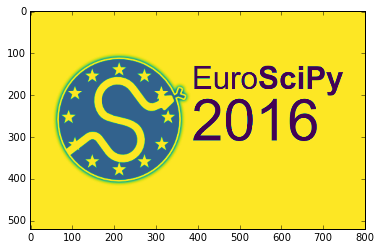

In [14]:
plt.imshow(lum_img2, cmap ='viridis')

In [15]:
####Exercise: apply a colormap of your choice to both images

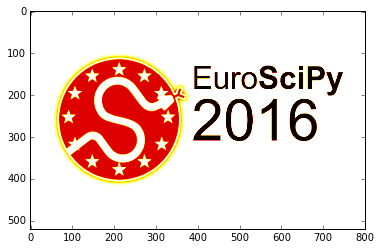

In [16]:
plt.imshow(lum_img2, cmap="hot")

Given the grayscale the result would have been the same for any of the SciPy Logo's color channels. Let us try how this changes with the RGB image?

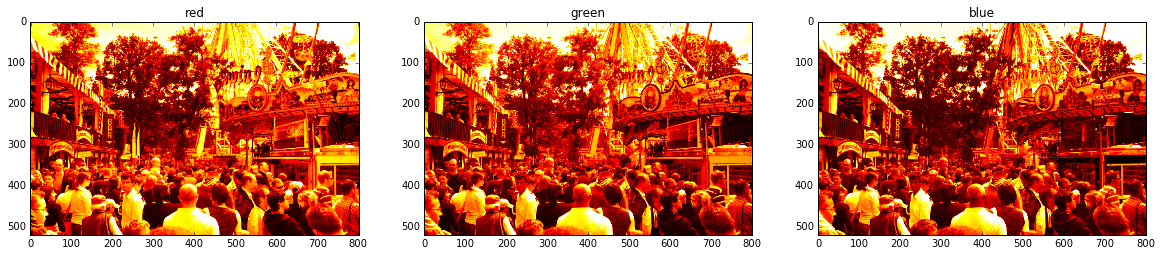

In [17]:
fig = plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
plt.imshow(img1[:,:,0], cmap="hot")
plt.title('red')
plt.subplot(1,3,2)
plt.imshow(img1[:,:,1], cmap="hot")
plt.title('green')
plt.subplot(1,3,3)
plt.imshow(img1[:,:,2], cmap="hot")
plt.title('blue')


Note that you can also change colormaps on existing plot objects using the set_cmap() method:

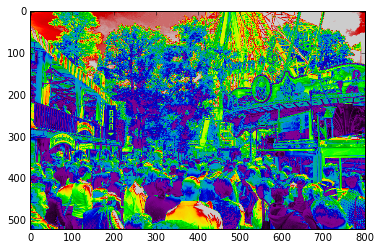

In [18]:
lum_img1 = img1[:,:,1]
imgplot1 = plt.imshow(lum_img1)
imgplot1.set_cmap('spectral')

#### Color scale reference

It’s helpful to have an idea of what value a color represents. We can do that by adding color bars.

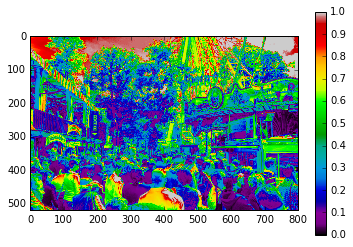

In [19]:
imgplot1 = plt.imshow(lum_img1,'spectral')
plt.colorbar()

#### Examining a specific data range¶

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the **hist()** function.

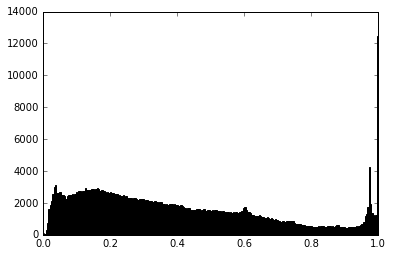

In [20]:
hist1 = plt.hist(lum_img1.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

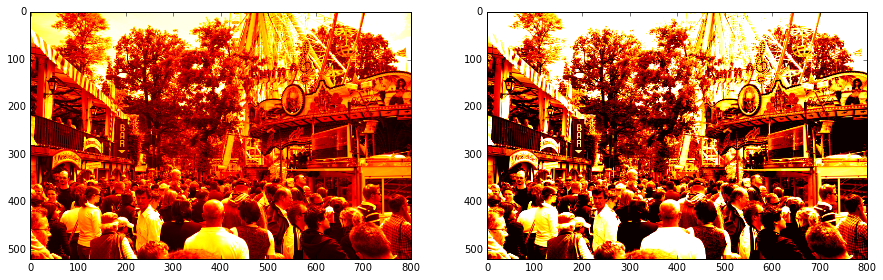

In [21]:
fig = plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
imgplot1 = plt.imshow(lum_img1, cmap='hot')
plt.subplot(1,2,2)
imgplot1 = plt.imshow(lum_img1, cmap='hot', clim=(0.1, 0.7))

#### Exercise: Use **hist** and **clim** to make the euroscipy  symbol (lum_img2) disappear
Hint: it should look like 
![hide](ESP_hide.png)

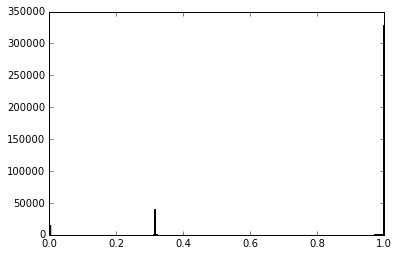

In [22]:
hist2 = plt.hist(lum_img2.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

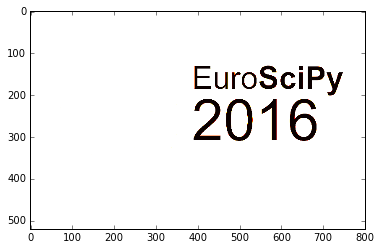

In [23]:
imgplot1 = plt.imshow(lum_img2, cmap='hot', clim=(0, 0.3))

#### Combining Images

Arrays can be summed or combined in any other mathematical way and the result plotted again. This might be used for example for watermarks.

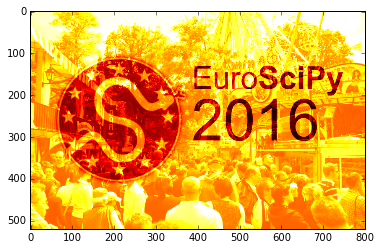

In [24]:
lum_img_comb1 = (lum_img1 + lum_img2)/2.
plt.imshow(lum_img_comb1, cmap='hot')

#### Exercise: merge an RGB img1 and a white EuroScipy img2
Hint: it should look like
![merge](merge.png)

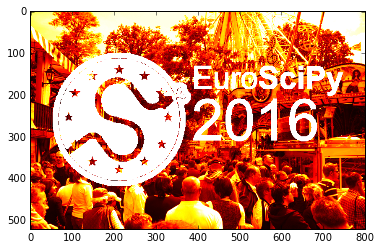

In [25]:
lum_img_comb2 = lum_img1.copy()
lum_img_comb2[lum_img2 < 1] = 1
plt.imshow(lum_img_comb2, cmap='hot')

#### Array Interpolation schemes¶

Interpolation calculates what the color or value of a pixel “should” be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there’s missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let’s take our image and shrink it. We’re effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren’t there anymore, and the computer has to draw in pixels to fill that space.

We’ll use the Pillow library that we used to load the image also to resize the image.

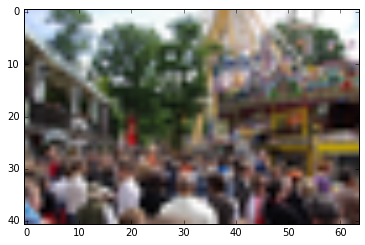

In [26]:
from PIL import Image
img1r = Image.open('BKW_Erlangen.png')
img1r.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot1a = plt.imshow(img1r)


Here we have the default interpolation, bilinear, since we did not give imshow() any interpolation argument.

Let’s try some others:

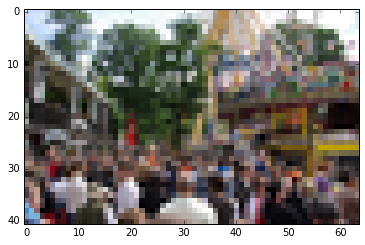

In [27]:
imgplot1b = plt.imshow(img1r, interpolation="nearest")

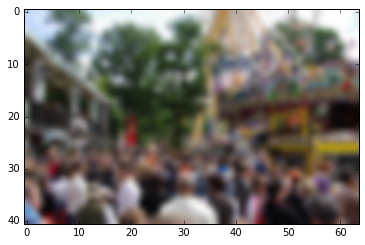

In [28]:
imgplot1c = plt.imshow(img1r, interpolation="bicubic")

#### Exercise: place a small symbol of img2 in img1 (right bottom corner)
Hint: it might look like 
![picinpic](picinpic.png)

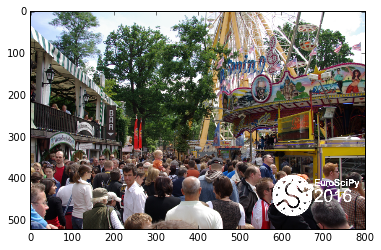

In [29]:
img1r = Image.open('BKW_Erlangen.png')
lum_img_comb3 = np.asarray(img1r).copy()
img2r = Image.open('ESP_2016.png')
img2rr = img2r.resize((240,160))
#img2r.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
substitute = np.asarray(img2rr.convert("RGB"))
lum_img_comb3[-160::,-240::,:][substitute < 255] = 255
plt.imshow(lum_img_comb3)

### Contours and Surfaces

**contour()** and **contourf()** draw contour lines and filled contours, respectively. Except as noted, function signatures and return values are the same for both versions.

**contourf()** differs from the MATLAB version in that it does not draw the polygon edges. To draw edges, add line contours with calls to **contour()**.

#### Contours of an Image

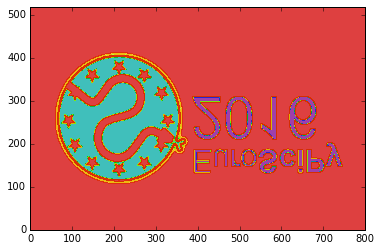

In [30]:
C = plt.contourf(lum_img2, 8, alpha=.75, cmap='spectral')


In [31]:
import numpy as np
c_img2 = np.flipud(lum_img2)

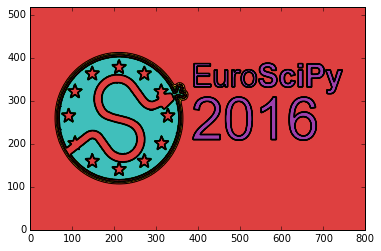

In [32]:
C = plt.contourf(c_img2, 8, alpha=.75, cmap='spectral')
C2 = plt.contour(c_img2, 8, colors='black', linewidth=.2)



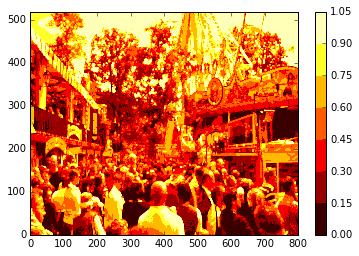

In [33]:
C = plt.contourf(np.flipud(lum_img1), 8, cmap='hot')
cbar = plt.colorbar()



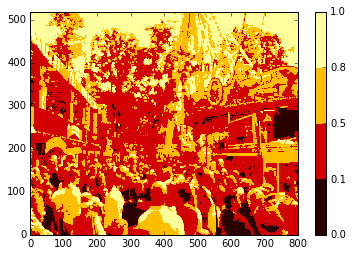

In [34]:
C = plt.contourf(np.flipud(lum_img1), levels = [0,0.1,0.5, 0.8,1], cmap='hot')
cbar = plt.colorbar()



#### Exercise: save the Bergkirchweih image with only 5 colors of your choice
Hint: it might look like
![test](test.png)

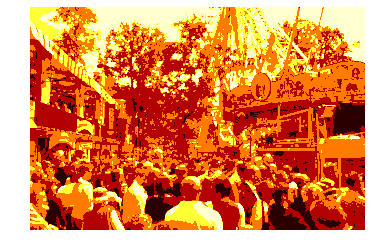

In [35]:
C = plt.contourf(np.flipud(lum_img1), levels = [0,0.1,0.4, 0.7, 0.9,1], cmap='hot')
plt.axis('off')
plt.gcf().savefig('test.png')


#### Contour of Arrays

There are many ways to plot an array. Especially for functions #D plots or contours are quite common.

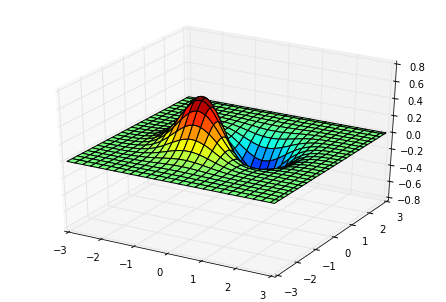

In [36]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

from mpl_toolkits.mplot3d import Axes3D

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, f(X, Y), cmap='jet')


A simple contourplot could look like this

([], <a list of 0 Text yticklabel objects>)

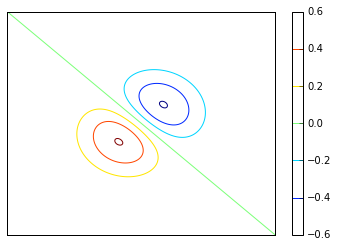

In [37]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

plt.contour(X, Y, f(X, Y), 8, cmap='jet')
plt.colorbar()

plt.xticks(())
plt.yticks(())


Instead of the colorbar legend values inside the plot might be handy.

([], <a list of 0 Text yticklabel objects>)

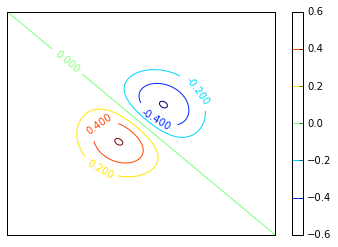

In [38]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.contour(X, Y, f(X, Y), 8, cmap='jet', linewidth=.5)
plt.colorbar()
plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())


It can be filled.

([], <a list of 0 Text yticklabel objects>)

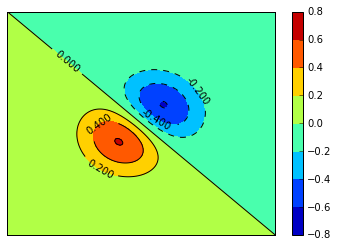

In [39]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.contourf(X, Y, f(X, Y), 8, cmap='jet')
cbar = plt.colorbar()
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
clabel = plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())

Another way of filling.

([], <a list of 0 Text yticklabel objects>)

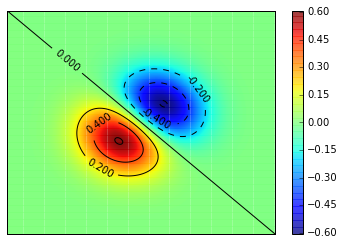

In [40]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.pcolor(X, Y, f(X, Y), alpha= 0.5, cmap='jet')
cbar = plt.colorbar()
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
clabel = plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())

#### Exercise: make the level lines thicker and darker with increasing values
Hint: it could look like
![contour](contour.png)

([], <a list of 0 Text yticklabel objects>)

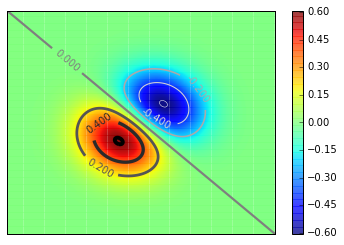

In [41]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.pcolor(X, Y, f(X, Y), alpha= 0.5, cmap='jet')
cbar = plt.colorbar()
C = plt.contour(X, Y, f(X, Y), 8, cmap = "binary", linewidths=np.arange(0.5,5,4.5/8))
clabel = plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())

In [42]:
np.arange(0.5,3,2.5/8)

array([ 0.5   ,  0.8125,  1.125 ,  1.4375,  1.75  ,  2.0625,  2.375 ,
        2.6875])

Usually you do not know the function but measure some metrics.

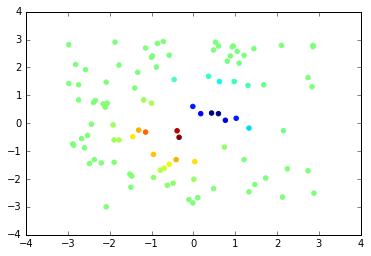

In [43]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x_rand = np.random.randint(256, size = 100)
y_rand = np.random.randint(256, size = 100)

cols = []
for i in range(100):
    cols.append(f(x[x_rand[i]], y[y_rand[i]]))

plt.scatter(x[x_rand], y[y_rand], color = plt.cm.jet((cols+abs(min(cols)))/(max(cols)+abs(min(cols)))))

You might to interpolate a linearly spaced grid from the measurements so you can plot the data.

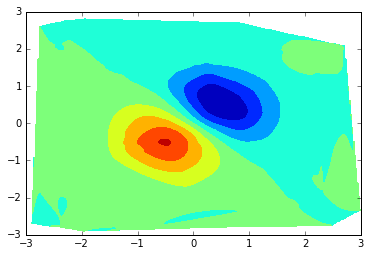

In [44]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x_rand = np.random.randint(256, size = 100)
y_rand = np.random.randint(256, size = 100)

from scipy.interpolate import griddata
def grid(x, y, z, n):
    xi = np.linspace(-3, 3, n)
    yi = np.linspace(-3, 3, n)
    
    Z = griddata((x, y), z, (xi[None, :], yi[:, None]), method='cubic')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(x[x_rand], y[y_rand], f(x[x_rand], y[y_rand]), n)
C = plt.contourf(X, Y, Z, 8, cmap='jet')


### Bonus Exercise

#### Face Symmetry: The angel and the devil in you...

Make a symmetric selfie and safe it in the same folder as the Jupyter Notebook. Find the center of your face. Do a subplot containing one the right half of your face and a flipped right half on the left and a subplot containing the left half of your face and a flipped left half on the right. Do you look like a close relative? Do you like one side better than the other? Have fun with exchanging your better halfs!
Hint: it might look like 
![f_symmetry](f_symmetry.png)

(-0.5, 1279.5, 719.5, -0.5)

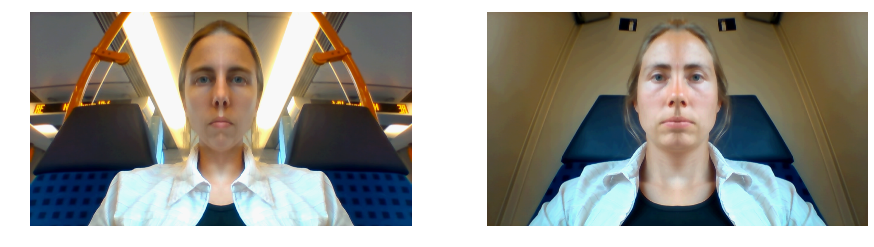

In [45]:
face = mpimg.imread('face.jpg')
#face.shape
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(np.hstack([face[:,0:640,:],np.fliplr(face[:,0:640,:])]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.hstack([np.fliplr(face[:,640::,:]),face[:,640::,:]]))
plt.axis('off')
